In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# data fater preprocessing

In [4]:
df = pd.read_csv('outlier_remove.csv')
df.shape

(66452, 59)

In [25]:
df.columns

Index(['id', 'song', 'album', 'artist', 'acousticness_x', 'danceability_x',
       'duration_ms_x', 'energy_x', 'instrumentalness_x', 'key_x',
       'liveness_x', 'loudness_x', 'mode_x', 'speechiness_x', 'tempo_x',
       'time_signature', 'valence_x', 'album_id', 'date', 'date_year',
       'duration_ms_d', 'com_f_x', 'acousticness_y', 'artists',
       'danceability_y', 'duration_ms_y', 'energy_y', 'explicit',
       'instrumentalness_y', 'key_y', 'liveness_y', 'loudness_y', 'mode_y',
       'name', 'popularity', 'release_date', 'speechiness_y', 'tempo_y',
       'valence_y', 'year', 'release_date_year', 'artists_d', 'com_f_y',
       'popularity_dummy', 'lyrics', 'stats_dict_tuple', 'num_sentences',
       'num_words', 'num_syllables', 'readability', 'grade', 'richness',
       'Language', 'neg', 'neu', 'pos', 'compound', 'compound_vader_polarity',
       'artist_popularity'],
      dtype='object')

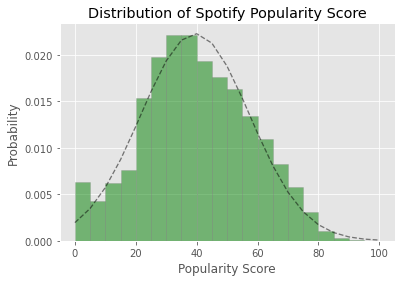

In [14]:
from scipy.stats import norm
nM,binsM,patchesM = plt.hist(df['popularity'], 20, density=True, alpha=0.5, edgecolor='grey', color='g')
yM = norm.pdf(binsM, df['popularity'].mean(), df['popularity'].std())
plt.plot(binsM,yM,'k--', alpha=0.5, linewidth=1.3)
plt.title('Distribution of Spotify Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Probability')
plt.show()

Text(0, 0.5, 'Popularity Score')

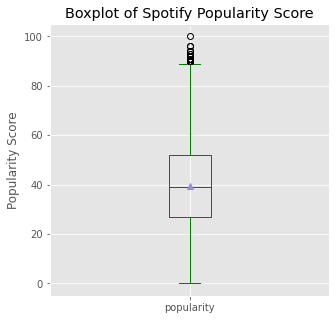

In [15]:
plt.figure(figsize=(5,5))
pd.DataFrame(df['popularity']).boxplot(showmeans = True, showfliers = True, color='g')                                                                    
plt.title('Boxplot of Spotify Popularity Score')
plt.ylabel('Popularity Score')

In [37]:
df['popularity'].describe()

count    66452.000000
mean        39.511241
std         17.910422
min          0.000000
25%         27.000000
50%         39.000000
75%         52.000000
max        100.000000
Name: popularity, dtype: float64

In [31]:
top = df.sort_values(by=['popularity'], ascending=False)
col = ['acousticness_y', 'danceability_y', 'energy_y', 'instrumentalness_y',  
       'liveness_y', 'loudness_y', 'speechiness_y', 'tempo_y', 'valence_y']
top_audio=top[col]

In [32]:
col=['Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']
top_audio.columns=col
top_audio

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
5400,0.72100,0.585,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132
5402,0.46800,0.737,0.802,0.000000,0.0931,-4.771,0.0878,144.015,0.682
5401,0.22100,0.700,0.722,0.000000,0.2720,-3.558,0.0369,90.989,0.756
5403,0.23700,0.830,0.585,0.000000,0.2480,-6.476,0.0940,109.978,0.485
5405,0.21800,0.889,0.340,0.130000,0.0550,-7.773,0.0697,94.009,0.716
...,...,...,...,...,...,...,...,...,...
1645,0.97200,0.342,0.263,0.000005,0.1310,-13.416,0.0344,104.896,0.295
940,0.00155,0.533,0.635,0.000022,0.3450,-8.418,0.2950,84.486,0.493
941,0.00182,0.640,0.888,0.000039,0.2910,-5.211,0.1320,164.013,0.744
1644,0.20200,0.490,0.860,0.903000,0.1250,-5.957,0.0520,130.643,0.520


In [33]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(top_audio)
audio_scaled = scaler.transform(top_audio)
audio_scaled

array([[ 1.10569284,  0.1614536 , -0.53004948, ..., -0.16822372,
         0.81656291, -1.64435473],
       [ 0.34970222,  1.07263648,  0.94100703, ...,  0.1364159 ,
         0.82133795,  0.55657916],
       [-0.38835977,  0.85083539,  0.61946462, ..., -0.42337314,
        -0.97441549,  0.85270481],
       ...,
       [-1.04329267,  0.49115793,  1.28666511, ...,  0.62251955,
         1.49858076,  0.80468444],
       [-0.44513377, -0.4080357 ,  1.17412527, ..., -0.25730606,
         0.36848812, -0.09169591],
       [-0.95639857,  0.20941059, -0.47377956, ..., -0.49155963,
        -0.26103816, -0.35580798]])

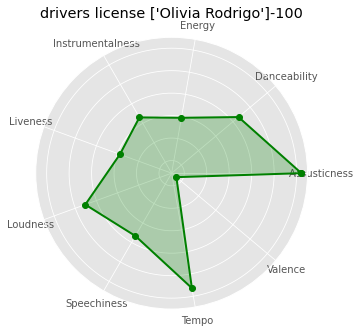

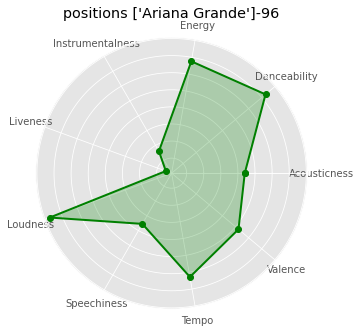

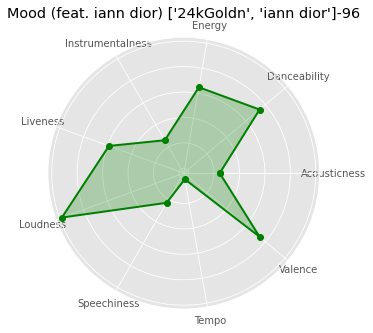

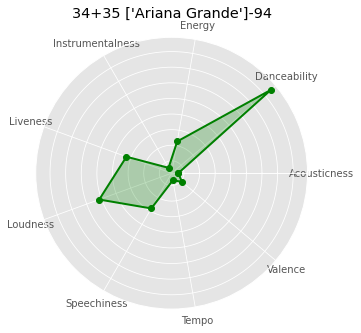

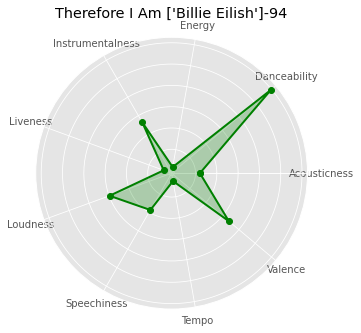

In [34]:
N = len(col)
for i in range(5):
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    values=audio_scaled[i]
    values=np.concatenate((values,[values[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, 'o-', linewidth=2, color='g')
    ax.fill(angles, values, alpha=0.25, color='g')
    ax.set_thetagrids(angles * 180/np.pi, col)
    ax.tick_params('y', labelleft=False)
    ax.grid(True)
    plt.title('{} {}-{}'.format(top['name'][i:i+1].values[0],top['artists'][i:i+1].values[0],top['popularity'][i:i+1].values[0]))
    plt.savefig(fname='{}'.format(i), dpi=500)
    plt.show()